# AUTHOR: NANDHINI S

# GRIP @ The Sparks Foundation

# TASK 1 - Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours.

# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

•1st I have imported required libraries that are pandas NumPy and matplotlib

# Step 1 - Reading the dataset

In [2]:
data=pd.read_csv("E:\spark data\score.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


• I have loaded my dataset and stored my data as variable data 

•	In the hours column u can see the no of study hrs of different students per day and based on that there are scores or percentile is given

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


• data.head () so this will give us the initial 5 rows and similarly data.tail() 

In [6]:
#to find no of rows and columns
data.shape

(25, 2)

• To find the total count of no of rows and columns we use data.shape,so u can see there are 25 rows and 2 columns

In [7]:
#to find information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


• Data.info() will give all the information  of our dataset 

In [8]:
#CHECK FOR NULL VALUES IN DATASET
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

• To check if our dataset contain any null value or missing value we can use the code ds.isnull().sum()

OBSERVATION:There is no null value in the Dataset 

# Step 2 - Data Visualization

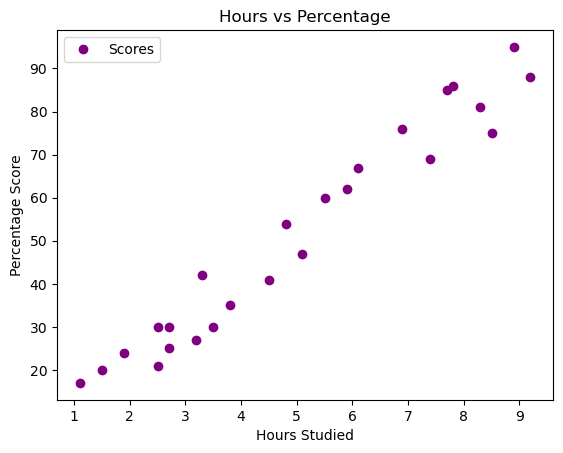

In [9]:
#to check relation b/w variables
data.plot(x='Hours', y='Scores', style='o',color='purple')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

• The 2nd step is data visualization in this step I have plotted the dataset using matplotlib  to check the relation between 2 variables that are hours studied and percentage

• plt.figure(figsize=(5,5)) this is used to manage the size of the graph

• I have assigned x variable for hours and y variable for scores

• From the graph we can observe a positive linear relation between the number of hours studied and percentage  scored


# Step 3 - Data Preprocessing

In [10]:
#splitting the data using iloc function
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

• 3rd step is data preprocessing in this step I have divided the data into 2 parts that are attributes and labels using iloc function

# Step 4 - Model Training

In [11]:
#splitting data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

• This data will then be divided into training and test sets.
Scikit-Learn's built-in train_test_split() method will be used to execute this

• For this I have importing train test split from sklearn

• Test size equals to 0.2 this is because of dividing the data into 2 parts in 80:20 ratio and randomstate equals to  0 because we wanted to select the values randomly


In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

• To train the algorithm we should import linear algorithm from sklearn

• Stored linear regression in a variable called regressor now the model is trained and ready to visualize

# Step 5 - Plotting the Line of regression

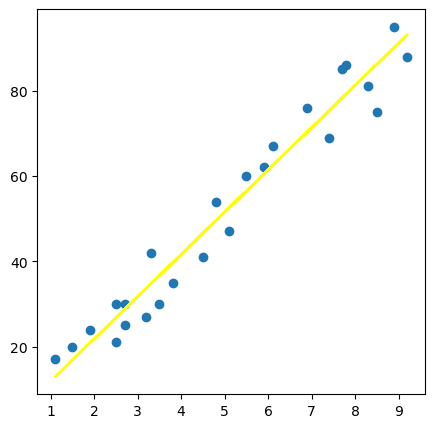

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(5,5))
plt.scatter(X, y)
plt.plot(X, line,color='yellow');
plt.show()

• 5th step is to plot the line of regression Now to visualize the data model what we actually going to do is  getting the best fit line for our graph 

# Step 6 - Making Predictions

Testing data - In Hours

In [14]:
#testing data
print(X_test)
#model prediction
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


• 6th step is to make prediction Now that we have trained our algorithm, it's time to test the model by making some predictions. For this we will use our test-set data

# Step 7 - Comparing Actual result to the Predicted Model result

In [15]:
df = pd.DataFrame({'Actual Marks': y_test,'Predicted Marks': y_pred})  
df

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [16]:
# Testing the model with our own data
hrs = [9.25]
prediction= regressor.predict([hrs])
print("Score = {}".format(round(prediction[0],3)))

Score = 93.692


The regression model predicts that a student who studies for 9.25 hours each day will most likely receive a grade of 93.69.

# Step 8 - Evaluating the model

In [17]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002982


A low mean absolute error indicates that there is relatively less chance for the model to predict incorrectly.